<a href="https://colab.research.google.com/github/PromitHal/AI_ML/blob/main/Heart_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
dataset=pd.read_csv('heart1.csv')

dataset.head()
import seaborn as sns

In [10]:
import numpy as np

In [3]:
dataset.shape

(303, 14)

In [4]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
X=dataset.drop(columns='target',axis=1)

In [6]:
Y=dataset['target']

In [11]:
X_array=np.array(X)
Y_array=np.array(Y)


In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [12]:
X_dataset=sc.fit_transform(X_array)

In [13]:
Y_dataset=Y_array

In [14]:
shape=(Y_dataset.size,Y_dataset.max()+1)

In [16]:
one_hot_encoded=np.zeros(shape)

In [17]:
for i in range(len(Y_dataset)):
  x=Y_dataset[i]
  for j in range(2):
    if(j==x):
      one_hot_encoded[i][j]=1
    else:
      one_hot_encoded[i][j]=0

In [18]:
one_hot_encoded[0]

array([0., 1.])

In [19]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X_dataset,one_hot_encoded,test_size=0.1)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from keras.layers import Dense

In [21]:
model=Sequential()
model.add(Dense(16,input_dim=13,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history=model.fit(X_train,Y_train,epochs=1000,batch_size=32)

Epoch 1/1000
9/9 [==============================] - 1s 2ms/step - loss: 0.7079 - accuracy: 0.4779
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5478
Epoch 3/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.6434
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.7096
Epoch 5/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7463
Epoch 6/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.7757
Epoch 7/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.7904
Epoch 8/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7868
Epoch 9/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.8051
Epoch 10/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.8235
Epoch 11/1000
9/9 [

In [24]:
X_test_standard=sc.transform(X_test)

In [25]:
Y_predict=model.predict(X_test)

In [26]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [28]:
cmatrix=confusion_matrix(Y_test.argmax(axis=1),Y_predict.argmax(axis=1))

In [29]:
cm_df = pd.DataFrame(cmatrix,
                     index = ['Not_Affected','Affected'], 
                     columns = ['Not_Affected','Affected'])

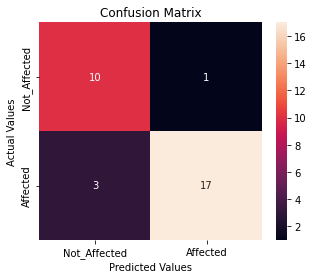

In [30]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()